In [1]:
%matplotlib inline

# importing pandas and numpy
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import os

In [2]:
# TG	Etmaalgemiddelde temperatuur (in 0.1 graden Celsius)
# RH	Etmaalsom van de neerslag (in 0.1 mm) (-1 voor <0.05 mm)
# SP	Percentage van de langst mogelijke zonneschijnduur
# FG	Etmaalgemiddelde windsnelheid (in 0.1 m/s)

data = pd.read_csv(os.path.join('..', 'data', 'datasets', 'etmgeg_260.csv'), index_col='YYYYMMDD', parse_dates=['YYYYMMDD'])
data.head()

,TG,RH,SP,FG
YYYYMMDD,,,,
2005-01-02,64.0,-1.0,14.0,59.0
2005-01-03,75.0,0.0,8.0,48.0
2005-01-04,76.0,16.0,0.0,66.0
2005-01-05,59.0,32.0,0.0,42.0
2005-01-06,77.0,3.0,64.0,50.0


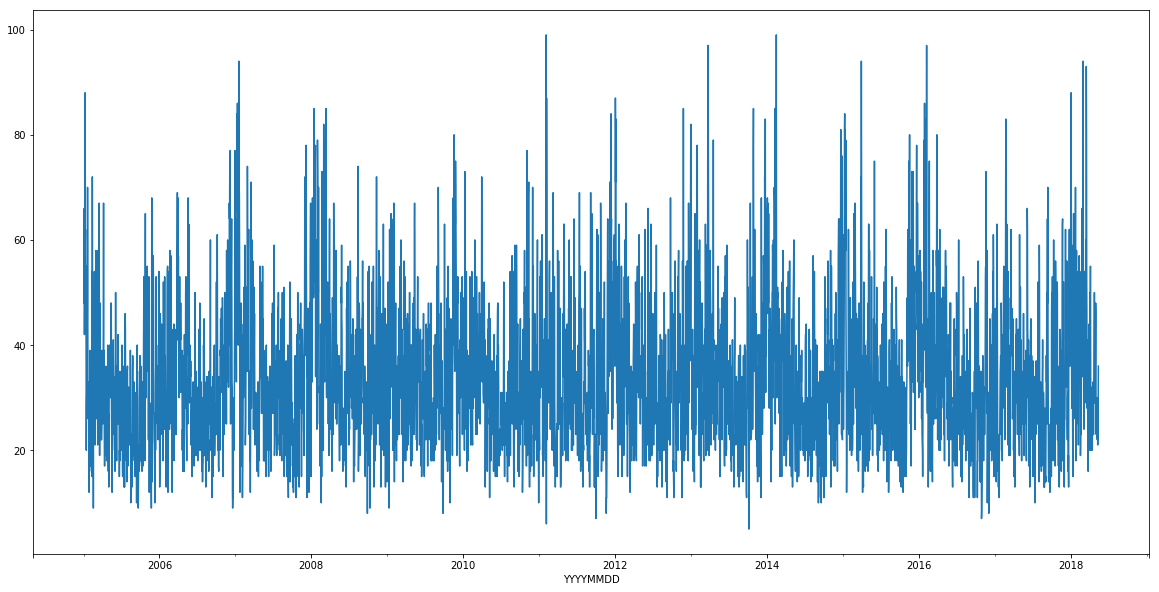

In [3]:
_, ax = plt.subplots(figsize=(20, 10))
data.FG.plot(ax=ax)

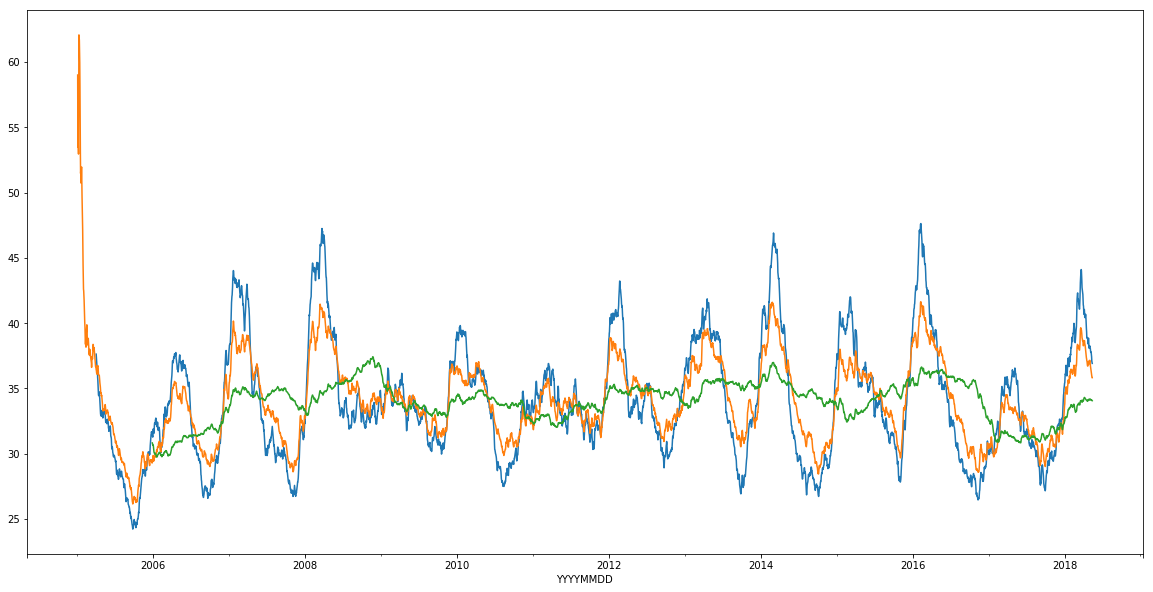

In [4]:
# moving windows
_, ax = plt.subplots(figsize=(20, 10))
data.FG.rolling(90).mean().plot(ax=ax)
data.FG.ewm(90).mean().plot(ax=ax)
data.FG.rolling(360).mean().plot(ax=ax)

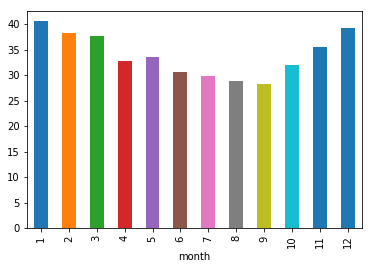

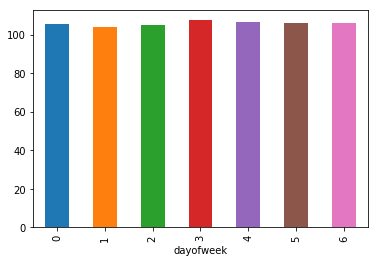

In [5]:
# use seasonal features
data['month'] = data.index.month # or data.column.dt.month
data.groupby('month')['FG'].mean().plot(kind='bar')
plt.show()

# dayofweek
data['dayofweek'] = data.index.dayofweek # or data.column.dt.month
data.groupby('dayofweek')['TG'].mean().plot(kind='bar')
plt.show()